In [ ]:
Clustering: K-Means
Dataset : Social_Network_Ads.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary.
Apply K-Means clustering algorithms (based on EstimatedSalary
column) to find the group of users.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv('Social_Network_Ads.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [14]:
numeric_data = data.drop(['Gender'],axis = 1)

In [16]:
scaler =  StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [17]:
X = scaled_data[:,numeric_data.columns.get_loc('EstimatedSalary')]

In [18]:
X = X.reshape(-1,1)

In [19]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [20]:
kmeans.fit(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

KMeans(n_clusters=3, random_state=42)

In [21]:
data['cluster'] = kmeans.labels_

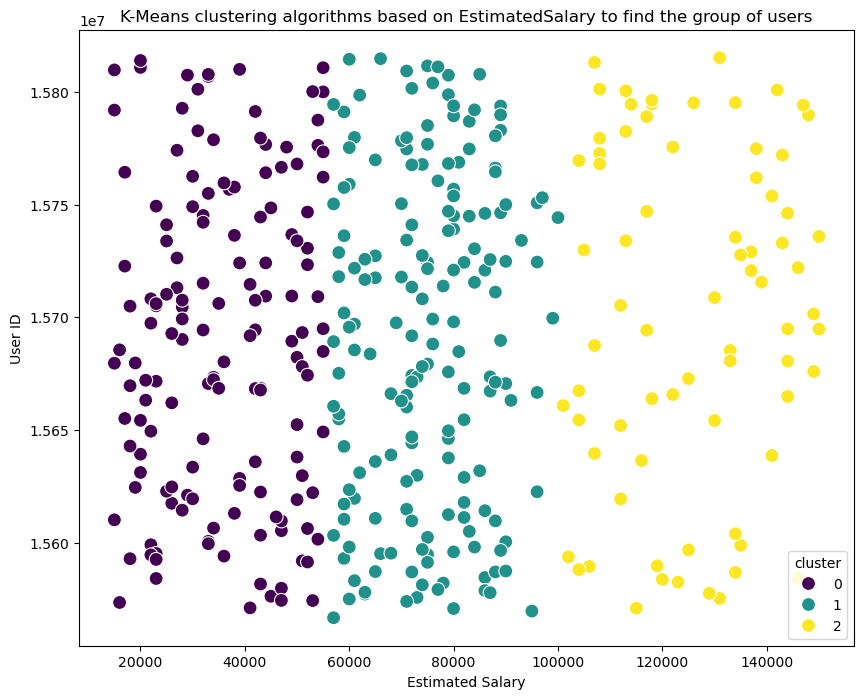

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'EstimatedSalary',y = 'User ID',hue = 'cluster', data = data, palette='viridis',s= 100)
plt.title("K-Means clustering algorithms based on EstimatedSalary to find the group of users")
plt.xlabel('Estimated Salary')
plt.ylabel('User ID')
plt.show()